# **KNN Breast Cancer**

### In KNN
1. Pick a value for K (i.e. 5)

2. Take the K nearest neighbors of the new data point according to their Euclidean distance.

3. Among these neighbors, count the number of data points in each category and assign the new data point to the category where you counted the most neighbors


#  Algorithm
1. Load the data.

2. Initialize K to your chosen number of neighbors.

3. For each example in the data:
  1. Calculate the distance between the query example and the current example from the data.

  2. Add the distance and the index of the example to an ordered collection.

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances.

5. Pick the first K entries from the sorted collection.

6. Get the labels of the selected K entries.

7. If regression, return the mean of the K labels.

8. If classification, return the mode of the K labels.

### Loading Dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [5]:
df['target']=pd.Series(cancer['target'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=42)

In [10]:
print ("Shape of Train Data:", X_train.shape)
print ("Shape of Test Data:", X_test.shape)

Shape of Train Data: (426, 30)
Shape of Test Data: (143, 30)


In [11]:
y_train.shape

(426,)

<Axes: ylabel='count'>

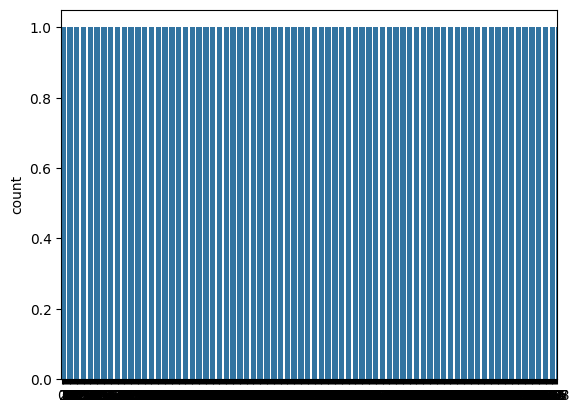

In [12]:
sns.countplot(y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()
#n_neighbors = 5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)

### Prediction Scores

In [16]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9342723004694836
0.965034965034965


### Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

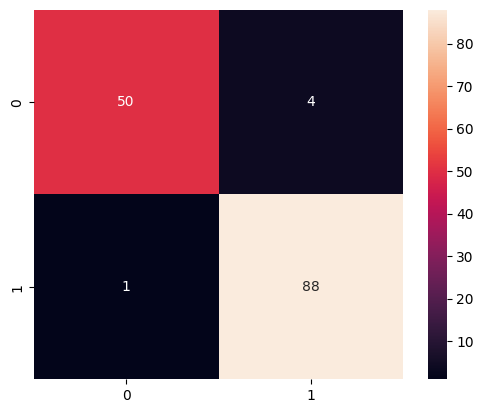

In [19]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

### How do we select the right value of K?
We don’t have a particular method for determining the correct value of K. Here, we’ll try to test the model’s accuracy for different K values. The value of K that delivers the best accuracy for both training and testing data is selected.

### It is recommended to always select an odd value of K
When the value of K is set to even, a situation may arise in which the elements from both groups are equal.In this condition, the model would be unable to do the correct classification for you. Here the model will randomly assign any of the two classes to this new unknown data.
Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

# <img src="https://editor.analyticsvidhya.com/uploads/369941_-pMkFM7U6GX22WUCLG5g2g.png" width="50%"/>

### The impact of selecting a smaller or larger K value on the model
- Larger K value : The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.


- Smaller k value : The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.

# 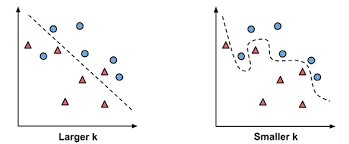


### Optimal value of K

In [20]:
error_rate = []
# Might take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

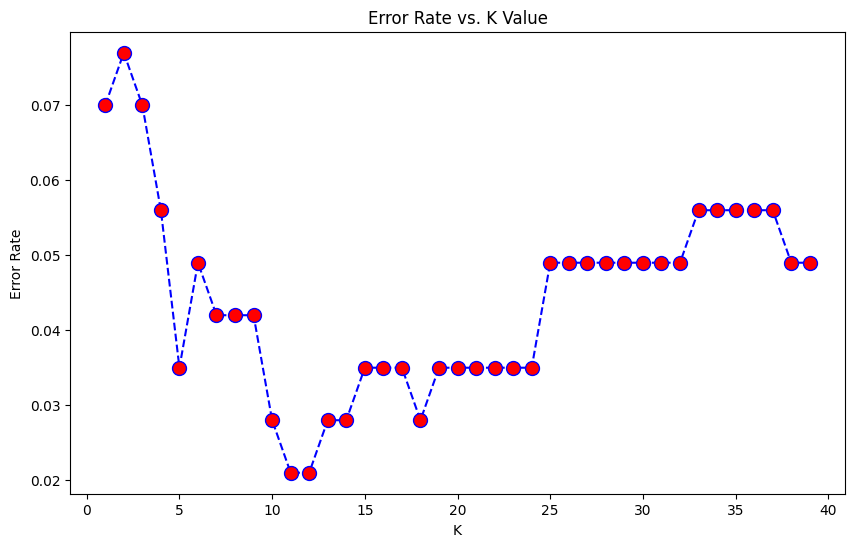

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=11)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [24]:
knn.score(X_train, y_train)

0.9342723004694836

In [25]:
knn.score(X_test, y_test)

0.9790209790209791

In [26]:
y_pred2 = knn.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



<Axes: >

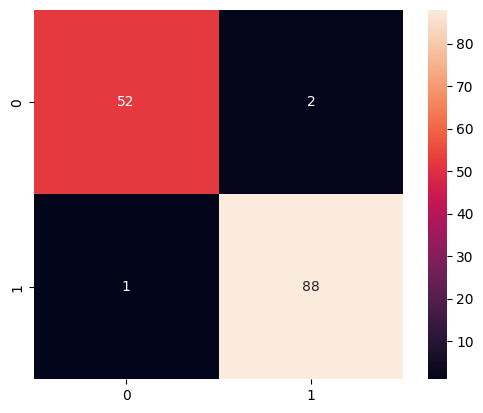

In [28]:
cm =confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, square=True , annot=True)